In [1]:
#LINK ASET
# - Sumber Dataset : https://www.kaggle.com/code/iamsouravbanerjee/decoding-customer-shopping-trends?kernelSessionId=149286501
# - Google Colab : https://colab.research.google.com/drive/1F8UuF5bcq4Z3CEFpTmzZREXDu0Yoyq84?usp=sharing
# - Dashboard :
# - Poster :
# - Laporan : https://docs.google.com/document/d/1JGfKsPvKzpNpHtJfeVsKWLVI2nX-5L76/edit?usp=sharing&ouid=110717512103064889118&rtpof=true&sd=true

# FINAL PROJECT - UJIAN AKHIR SEMESTER
# Mata Kuliah : Big Data & Predictive Analytics 2025
# Kelas : Informatika 1

# Nama Anggota Kelompok
# 1. Ulfiyatun Solekha - 23.11.5708
# 2. Laila Nuraini - 23.11.5740

# Tema Eksperimen : Pola belanja Online Pada Masyarakat Di Seluruh Dunia

In [2]:
# Rule :
# Lakukan eksperimen untuk melakukan prediksi menggunakan regresi linier sederhana dan atau regresi linier berganda dari dataset yang digunakan.
# Buat Visualisasi dari eksperimen yang dilakukan. (Jumlah minimal ada 3 visualisasi berbeda)

# Data Collection
# EDA dan Visualisasi data
# Analisis Korelasi
# Membuat Model Regresi Linier
# Evaluasi Model Linier

## Data Collection

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Upload File CVS ke Google Colab
from google.colab import files
uploaded = files.upload()

# Membaca dan menampilkan data dari file csv
df = pd.read_csv('shopping_trends.csv')
df.head(10)

Saving shopping_trends.csv to shopping_trends.csv


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually
5,6,46,Male,Sneakers,Footwear,20,Wyoming,M,White,Summer,2.9,Yes,Venmo,Standard,Yes,Yes,14,Venmo,Weekly
6,7,63,Male,Shirt,Clothing,85,Montana,M,Gray,Fall,3.2,Yes,Debit Card,Free Shipping,Yes,Yes,49,Cash,Quarterly
7,8,27,Male,Shorts,Clothing,34,Louisiana,L,Charcoal,Winter,3.2,Yes,Debit Card,Free Shipping,Yes,Yes,19,Credit Card,Weekly
8,9,26,Male,Coat,Outerwear,97,West Virginia,L,Silver,Summer,2.6,Yes,Venmo,Express,Yes,Yes,8,Venmo,Annually
9,10,57,Male,Handbag,Accessories,31,Missouri,M,Pink,Spring,4.8,Yes,PayPal,2-Day Shipping,Yes,Yes,4,Cash,Quarterly


In [4]:
# Informasi dasar tentang dataset
print("\nInfo of the dataset:")
print(df.info())
print("\n-----\n")

# Melihat isi dari DataFrame
print("\nContent of the dataset:")
print(df)
print("\n-----\n")

# Statistik deskriptif
print("\nDescriptive statistics of the dataset:")
print(df.describe())
print("\n-----\n")

# Melihat tipe data dari setiap kolom
print("\nData types of the columns:")
df.dtypes

#menampilkan kolom
df.columns

#mengetahui jumlah data dan kolom
df.shape

#mengetahui apakah ada nilai kosong di dataset
df_encoded = df.copy()
print(df_encoded.isnull().sum().sum())  # Total nilai NaN


Info of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null  

In [5]:
#cek dan skla Fitur Numerik
from sklearn.preprocessing import StandardScaler

# Pisahkan fitur numerik dan fitur kategorikal
numeric_cols = ['Age', 'Review Rating', 'Previous Purchases']
scaler = StandardScaler()
df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])

In [6]:
#Pisahkan Fitur dan Target dengan memprediksi Purchase Amount
X = df_encoded.drop('Purchase Amount (USD)', axis=1)
y = df_encoded['Purchase Amount (USD)']

In [7]:
#Split data ke Train & Test Set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [8]:
# Drop kolom tidak relevan
df.drop(columns=['Customer ID'], inplace=True)

# One-hot encoding kolom kategorikal
categorical_cols = df.select_dtypes(include='object').columns.tolist()
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Normalisasi fitur numerik
numeric_cols = ['Age', 'Review Rating', 'Previous Purchases']
scaler = StandardScaler()
df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])


##Visualisasi Data


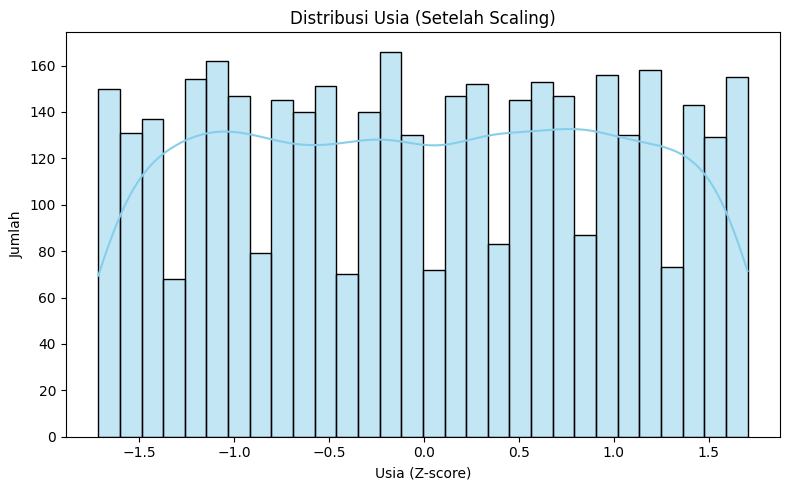

In [9]:
# Visualisasi 1: Histogram usia (setelah scaling)
plt.figure(figsize=(8, 5))
sns.histplot(df_encoded['Age'], bins=30, kde=True, color='skyblue')
plt.title("Distribusi Usia (Setelah Scaling)")
plt.xlabel("Usia (Z-score)")
plt.ylabel("Jumlah")
plt.tight_layout()
plt.show()

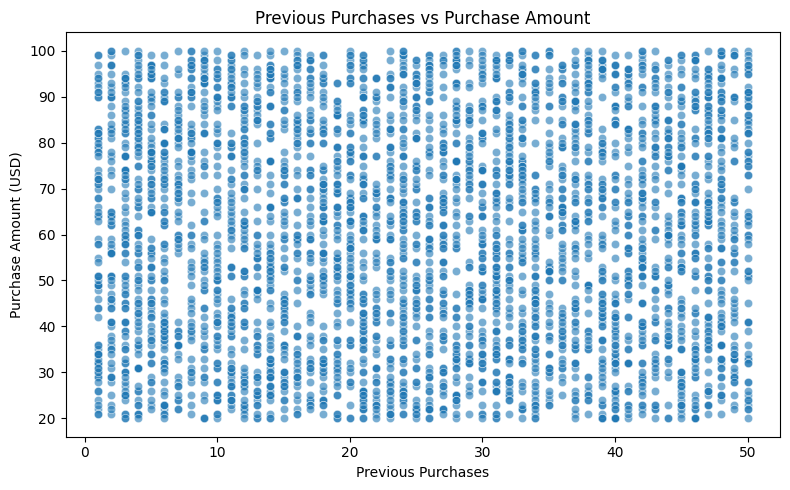

In [10]:
# Visualisasi 2: Scatterplot Previous Purchases vs Purchase Amount
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Previous Purchases'], y=df['Purchase Amount (USD)'], alpha=0.6)
plt.title("Previous Purchases vs Purchase Amount")
plt.xlabel("Previous Purchases")
plt.ylabel("Purchase Amount (USD)")
plt.tight_layout()
plt.show()

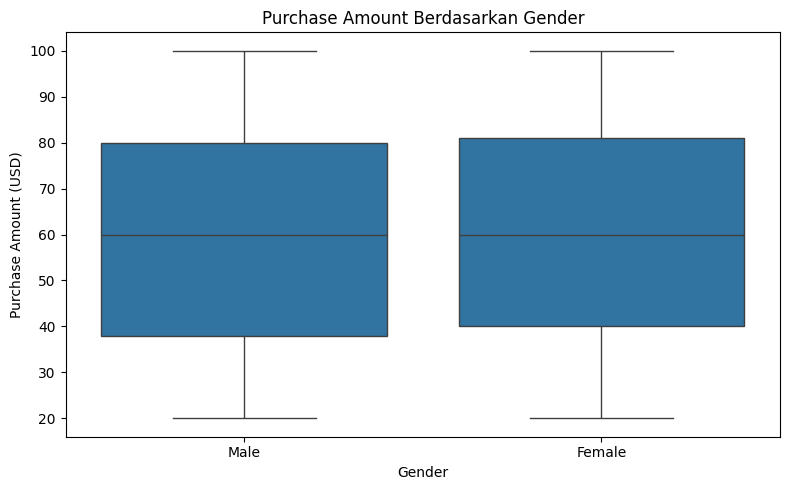

In [11]:
# Visualisasi 3: Boxplot Purchase Amount berdasarkan Gender
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Gender'], y=df['Purchase Amount (USD)'])
plt.title("Purchase Amount Berdasarkan Gender")
plt.xlabel("Gender")
plt.ylabel("Purchase Amount (USD)")
plt.tight_layout()
plt.show()

##Analisis Korelasi

In [12]:
data_final = pd.read_csv('shopping_trends.csv')  # atau hasil dari manipulasi dataframe lain


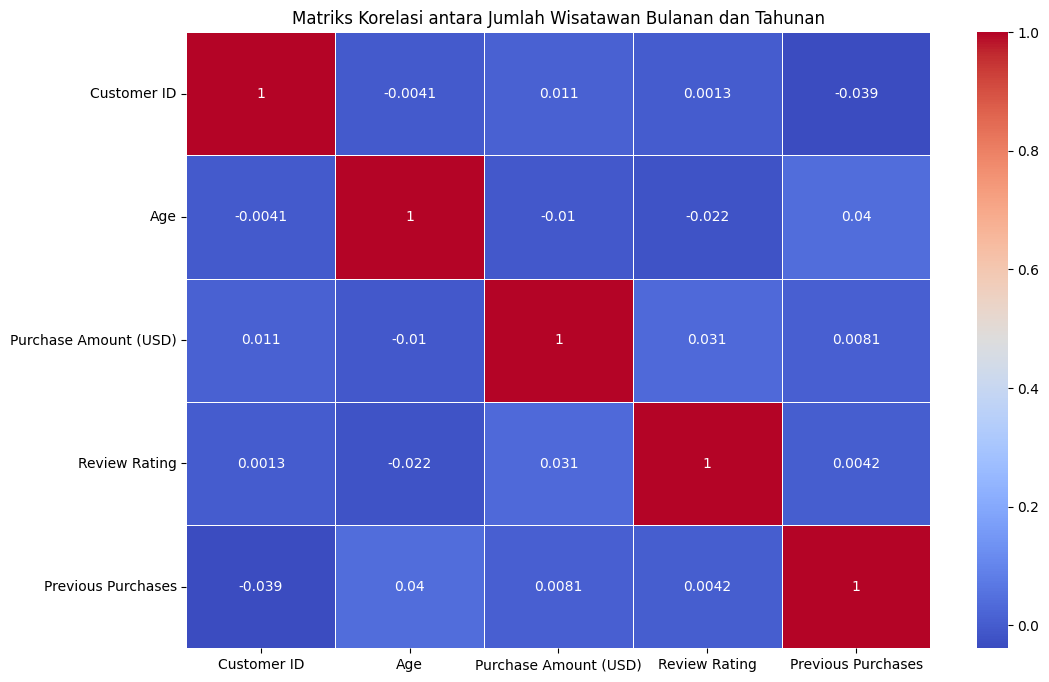

In [13]:
# Visualisasi 3: Heatmap Korelasi
# Analisis Korelasi
correlation_matrix = data_final.select_dtypes(include='number').corr()


# Visualisasi matriks korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriks Korelasi antara Jumlah Wisatawan Bulanan dan Tahunan')
plt.show()

##Model Regresi Linier

In [14]:
#Regresi Linier Sederhana
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Pisah fitur dan target
X = df_encoded.drop(columns=['Purchase Amount (USD)'])
y = df_encoded['Purchase Amount (USD)']

# Bagi data training & testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --------------------------------
# REGRESI LINIER SEDERHANA (Age)
# --------------------------------
X_train_simple = X_train[['Age']]
X_test_simple = X_test[['Age']]
model_simple = LinearRegression()
model_simple.fit(X_train_simple, y_train)
y_pred_simple = model_simple.predict(X_test_simple)

# Evaluasi sederhana
mse_simple = mean_squared_error(y_test, y_pred_simple)
r2_simple = r2_score(y_test, y_pred_simple)

print(" Regresi Linier Sederhana (Age → Purchase Amount):")
print(f"  - R-squared: {r2_simple:.4f}")
print(f"  - MSE: {mse_simple:.2f}")


 Regresi Linier Sederhana (Age → Purchase Amount):
  - R-squared: -0.0067
  - MSE: 563.31


In [15]:
# --------------------------------
# REGRESI LINIER GANDA (Semua fitur)
# --------------------------------
model_multiple = LinearRegression()
model_multiple.fit(X_train, y_train)
y_pred_multiple = model_multiple.predict(X_test)

# Evaluasi ganda
mse_multiple = mean_squared_error(y_test, y_pred_multiple)
r2_multiple = r2_score(y_test, y_pred_multiple)

print("🔹 Regresi Linier Ganda (Semua fitur):")
print(f"  - R-squared: {r2_multiple:.4f}")
print(f"  - MSE: {mse_multiple:.2f}")

🔹 Regresi Linier Ganda (Semua fitur):
  - R-squared: -0.0309
  - MSE: 576.88


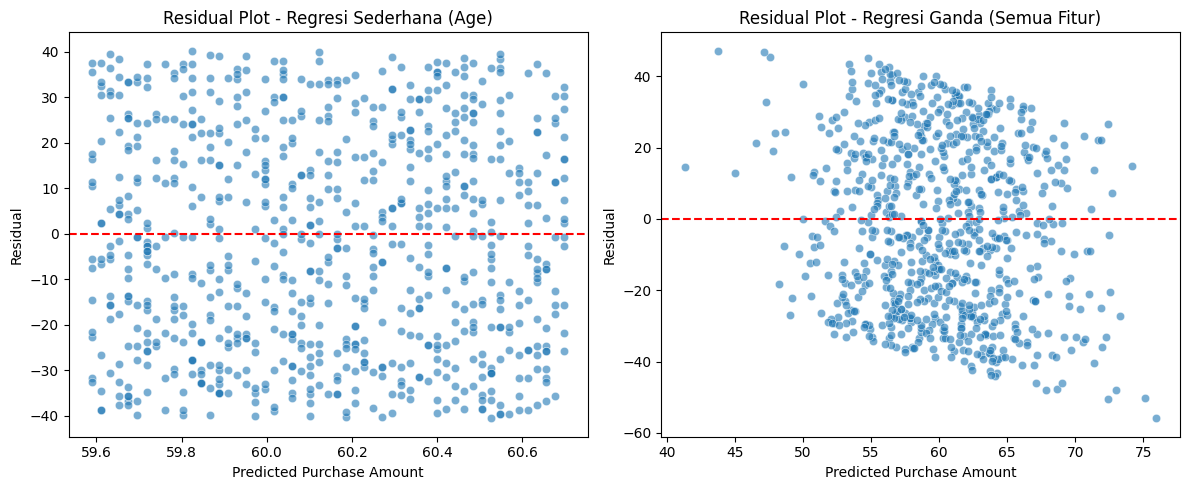

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Hitung residual
residuals_simple = y_test - y_pred_simple
residuals_multiple = y_test - y_pred_multiple

# Plot residual untuk model sederhana
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x=y_pred_simple, y=residuals_simple, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Residual Plot - Regresi Sederhana (Age)")
plt.xlabel("Predicted Purchase Amount")
plt.ylabel("Residual")

# Plot residual untuk model ganda
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_pred_multiple, y=residuals_multiple, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Residual Plot - Regresi Ganda (Semua Fitur)")
plt.xlabel("Predicted Purchase Amount")
plt.ylabel("Residual")

plt.tight_layout()
plt.show()


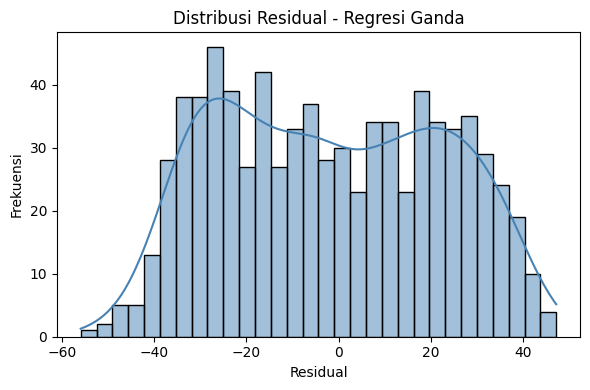

<Figure size 600x600 with 0 Axes>

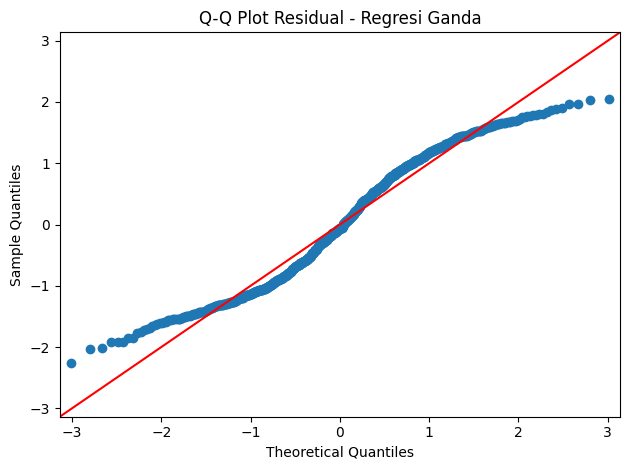

In [17]:
import scipy.stats as stats
import statsmodels.api as sm

# 1. Histogram Residual (Regresi Ganda)
plt.figure(figsize=(6, 4))
sns.histplot(residuals_multiple, kde=True, bins=30, color='steelblue')
plt.title("Distribusi Residual - Regresi Ganda")
plt.xlabel("Residual")
plt.ylabel("Frekuensi")
plt.tight_layout()
plt.show()

# 2. Q-Q Plot (Normalitas)
plt.figure(figsize=(6, 6))
sm.qqplot(residuals_multiple, line='45', fit=True)
plt.title("Q-Q Plot Residual - Regresi Ganda")
plt.tight_layout()
plt.show()


In [18]:
import pickle

In [19]:
with open('shopping_data.sav', 'wb') as file:
    pickle.dump(df, file)

print("DataFrame berhasil disimpan ke shopping_data.sav")

DataFrame berhasil disimpan ke shopping_data.sav
